## High and Low Pass Filters

Now, you might be wondering, what makes filters high and low-pass; why is a Sobel filter high-pass and a Gaussian filter low-pass?

Well, you can actually visualize the frequencies that these filters block out by taking a look at their fourier transforms. The frequency components of any image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum. So, let's treat our filters as small images, and display them in the frequency domain!

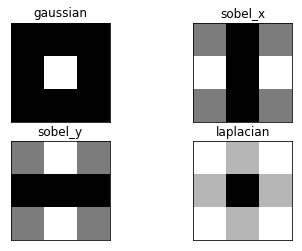

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

Areas of white or light gray, allow that part of the frequency spectrum through! Areas of black mean that part of the spectrum is blocked out of the image. 

Recall that the low frequencies in the frequency spectrum are at the center of the frequency transform image, and high frequencies are at the edges. You should see that the Gaussian filter allows only low-pass frequencies through, which is the center of the frequency transformed image. The sobel filters block out frequencies of a certain orientation and a laplace (all edge, regardless of orientation) filter, should block out low-frequencies!

You are encouraged to load in an image, apply a filter to it using `filter2d` then visualize what the fourier transform of that image looks like before and after a filter is applied.

In [14]:
## TODO: load in an image, and filter it using a kernel of your choice
## apply a fourier transform to the original *and* filtered images and compare them
image = cv2.imread('noah2.jpeg')


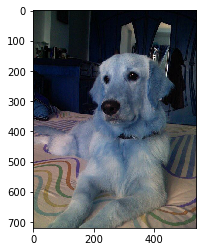

In [15]:
plt.imshow(image)

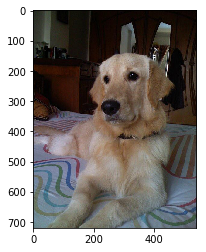

In [16]:
color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(color)

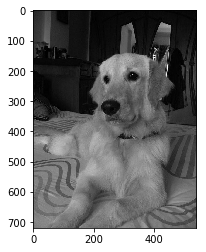

In [17]:
gray = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

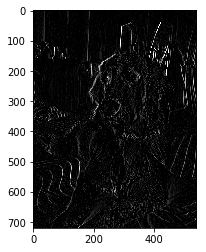

In [18]:
filtered_image = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image, cmap='gray')

In [19]:
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx


In [20]:
norm_image = gray/255

In [21]:
f_pic = ft_image(norm_image)

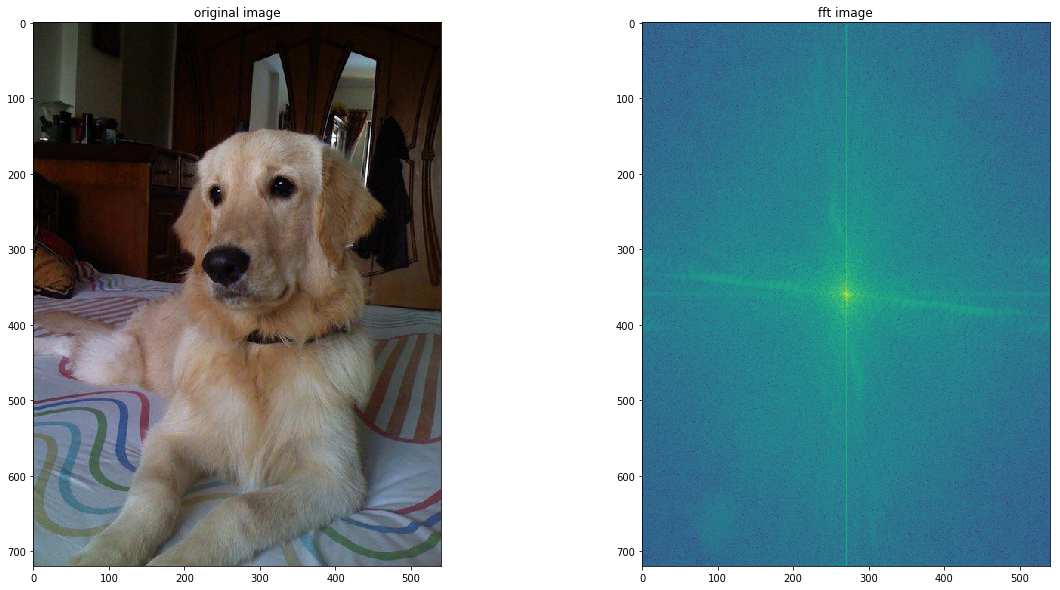

In [22]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.set_title('original image')
ax1.imshow(color)
ax2.set_title('fft image')
ax2.imshow(f_pic)

In [23]:
thetas = np.deg2rad(np.arange(-90,90))

In [24]:
thetas

array([-1.57079633, -1.55334303, -1.53588974, -1.51843645, -1.50098316,
       -1.48352986, -1.46607657, -1.44862328, -1.43116999, -1.41371669,
       -1.3962634 , -1.37881011, -1.36135682, -1.34390352, -1.32645023,
       -1.30899694, -1.29154365, -1.27409035, -1.25663706, -1.23918377,
       -1.22173048, -1.20427718, -1.18682389, -1.1693706 , -1.15191731,
       -1.13446401, -1.11701072, -1.09955743, -1.08210414, -1.06465084,
       -1.04719755, -1.02974426, -1.01229097, -0.99483767, -0.97738438,
       -0.95993109, -0.9424778 , -0.9250245 , -0.90757121, -0.89011792,
       -0.87266463, -0.85521133, -0.83775804, -0.82030475, -0.80285146,
       -0.78539816, -0.76794487, -0.75049158, -0.73303829, -0.71558499,
       -0.6981317 , -0.68067841, -0.66322512, -0.64577182, -0.62831853,
       -0.61086524, -0.59341195, -0.57595865, -0.55850536, -0.54105207,
       -0.52359878, -0.50614548, -0.48869219, -0.4712389 , -0.45378561,
       -0.43633231, -0.41887902, -0.40142573, -0.38397244, -0.36

In [27]:
width,height,depth = color.shape

In [28]:
width,height

(720, 540)

In [29]:
diag_len = np.ceil(np.sqrt(width * width + height * height))

In [30]:
diag_len

900.0

In [31]:
rhos = np.linspace(-diag_len, diag_len, diag_len * 2.0)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


In [34]:
len(rhos),len(thetas)

(1800, 180)

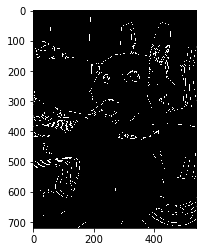

In [37]:
low_threshold = 100
high_threshold = 200
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

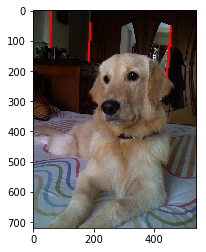

In [56]:
rho = 1
theta = np.pi/180
threshold = 100
min_line_length = 5
max_line_gap = 20

line_image = np.copy(color) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

In [53]:
lines

array([[[ 55, 123,  56,  75]],

       [[440, 222, 446, 154]],

       [[438, 216, 446, 132]],

       [[185, 126, 186,  97]]], dtype=int32)

In [57]:
hough_space = np.zeros((100,300))

In [59]:
len(hough_space[0])

300

In [67]:
def build_hough_space_fom_image(img, shape = (100, 300), val = 1):
    hough_space = np.zeros(shape)
    for i, row in enumerate(img):
        for j, pixel in enumerate(row):
            if pixel != val:
                continue
            
        hough_space = add_to_hough_space_polar((i,j), hough_space)
    return hough_space
def add_to_hough_space_polar(p, feature_space):
    space = np.linspace(0, np.pi, len(feature_space))
    d_max = len(feature_space[0]) / 2
    for i in range(len(space)):
        theta = space[i]
        d = int(p[0] * np.sin(theta) + p[1] * np.cos(theta)) + d_max
        if (d >= d_max * 2) : continue
        feature_space[i, d] += 1
    return feature_space

In [69]:
circles_im = np.copy(color)

In [ ]:
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                           minDist=45,
                           param1=70,
                           param2=11,
                           minRadius=20,
                           maxRadius=40)